### TEAM  10

 E.VIGNESH (CB.EN.P2DSC21010)

 N.SAI DHANUSH (CB.EN.P2DSC21016)

# QUESTION 1:

# PERFORMING MULTI-CLASS CLASSIFICATION FOR VARIOUS SPEECH EMOTIONS. ( USING MACHINE LEARNING)

## LINK FOR DOWNLOADING DATASET

https://drive.google.com/drive/folders/1S3j7CkyGWDpjS6OMSGOL0ka_osKff_Vg?usp=sharing

### Importing Dependencies

In [1]:
my_path ='C:/Users/voice/RAVDESS-RawData'

### File Naming Convention

Each of the 1440 files has a unique filename. The filename consists of a 7-part numerical identifier (e.g., 03-01-06-01-02-01-12.wav). These identifiers define the stimulus characteristics:

### FileName Identifiers

Modality (01 = full-AV, 02 = video-only, 03 = audio-only).

Vocal channel (01 = speech, 02 = song).

Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised).

Emotional intensity (01 = normal, 02 = strong). NOTE: There is no strong intensity for the 'neutral' emotion.

Statement (01 = "Kids are talking by the door", 02 = "Dogs are sitting by the door").

Repetition (01 = 1st repetition, 02 = 2nd repetition).

Actor (01 to 24. Odd numbered actors are male, even numbered actors are female).


### Emotion Labels

01 = neutral

02 = calm

03 = happy

04 = sad

05 = angry

06 = fearful

07 = disgust

08 = surprised

In [2]:
import os

In [3]:
my_data = os.listdir(my_path)

In [4]:
print("this is the len of our data: ", len(my_data))
print("this is an example of a wave file:", my_data[50])
print("this index position represents the emotion label:", my_data[50][6:8])

this is the len of our data:  1440
this is an example of a wave file: 03-01-01-01-02-01-03.wav
this index position represents the emotion label: 01


In [5]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

### Load audio file and visualize its waveform (using librosa)


In [6]:
data, sampling_rate = librosa.load(my_path+'/03-01-01-01-02-01-03.wav')

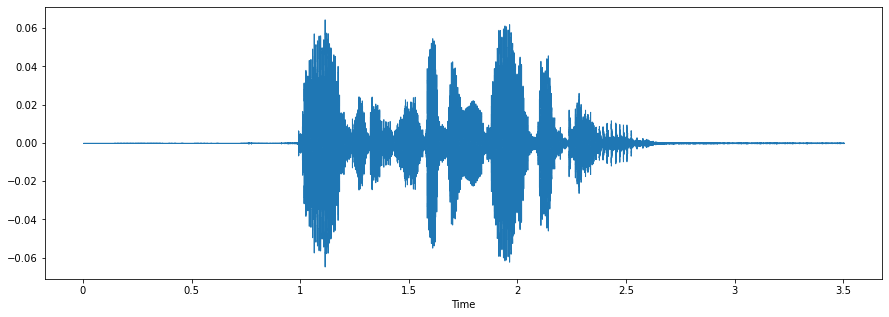

In [7]:
plt.figure(figsize=(15, 5))
librosa.display.waveshow(data, sr=sampling_rate)

### Convert the audio waveform

Mel-frequency cepstral coefficients (MFCC) extraction

This Function returns:

    Features
    Labels

In [8]:
import scipy.io.wavfile
import numpy as np

emotions_num = ["Neutral-01","Calm-02","Happy-03","Sad-04","Angry-05","Fearful-06","Disgust-07","Surprised-08"]
actors = ["01","02","03","04","05","06","07","08","09","10","11","12",
         "13","14","15","16","17","18","19","20","21","22","23","24"]
number_of_mfcc_features = 49

def mfcc_extraction(path, modal_vocal, emotions_num, actors):
    labels = []
    mean_features = []
    std_features = []
    var_features = []
    min_features = []
    max_features = []
    
    #with repetition number: 1 and statement number 1 and emotional intensity number #1
    for index1,emotion_num in enumerate(emotions_num):
        for index,actor in enumerate(actors):
            x, sr = librosa.load(path+modal_vocal+emotion_num[-2:]+"-01-01-01-"+actor+".wav", sr=44100)
            mean_mfccs = np.mean(librosa.feature.mfcc(y=x, sr=sr, n_mfcc=number_of_mfcc_features).T,axis=0) 
            std_mfccs = np.std(librosa.feature.mfcc(y=x, sr=sr, n_mfcc=number_of_mfcc_features).T,axis=0)
            var_mfccs = np.var(librosa.feature.mfcc(y=x, sr=sr, n_mfcc=number_of_mfcc_features).T,axis=0)
            min_mfccs = np.amin(librosa.feature.mfcc(y=x, sr=sr, n_mfcc=number_of_mfcc_features).T,axis=0)
            max_mfccs = np.amax(librosa.feature.mfcc(y=x, sr=sr, n_mfcc=number_of_mfcc_features).T,axis=0)
            
            mean_features.append(mean_mfccs)
            std_features.append(std_mfccs)
            var_features.append(var_mfccs)
            min_features.append(min_mfccs)
            max_features.append(max_mfccs)
            
            labels.append(emotion_num[:-3])
    
    #with repetition number: 1 and statement number 2 and emotional intensity number 1
    for index1,emotion_num in enumerate(emotions_num):
        for index,actor in enumerate(actors):
            x, sr = librosa.load(path+modal_vocal+emotion_num[-2:]+"-01-02-01-"+actor+".wav", sr=44100)
            mean_mfccs = np.mean(librosa.feature.mfcc(y=x, sr=sr, n_mfcc=number_of_mfcc_features).T,axis=0) 
            std_mfccs = np.std(librosa.feature.mfcc(y=x, sr=sr, n_mfcc=number_of_mfcc_features).T,axis=0)
            var_mfccs = np.var(librosa.feature.mfcc(y=x, sr=sr, n_mfcc=number_of_mfcc_features).T,axis=0)
            min_mfccs = np.amin(librosa.feature.mfcc(y=x, sr=sr, n_mfcc=number_of_mfcc_features).T,axis=0)
            max_mfccs = np.amax(librosa.feature.mfcc(y=x, sr=sr, n_mfcc=number_of_mfcc_features).T,axis=0)
            
            mean_features.append(mean_mfccs)
            std_features.append(std_mfccs)
            var_features.append(var_mfccs)
            min_features.append(min_mfccs)
            max_features.append(max_mfccs)
            
            labels.append(emotion_num[:-3])
    #with repetition number: 2 and statement number 1 and emotional intensity number #1
    for index1,emotion_num in enumerate(emotions_num):
        for index,actor in enumerate(actors):
            x, sr = librosa.load(path+modal_vocal+emotion_num[-2:]+"-01-01-02-"+actor+".wav", sr=44100)
            mean_mfccs = np.mean(librosa.feature.mfcc(y=x, sr=sr, n_mfcc=number_of_mfcc_features).T,axis=0) 
            std_mfccs = np.std(librosa.feature.mfcc(y=x, sr=sr, n_mfcc=number_of_mfcc_features).T,axis=0)
            var_mfccs = np.var(librosa.feature.mfcc(y=x, sr=sr, n_mfcc=number_of_mfcc_features).T,axis=0)
            min_mfccs = np.amin(librosa.feature.mfcc(y=x, sr=sr, n_mfcc=number_of_mfcc_features).T,axis=0)
            max_mfccs = np.amax(librosa.feature.mfcc(y=x, sr=sr, n_mfcc=number_of_mfcc_features).T,axis=0)
            
            mean_features.append(mean_mfccs)
            std_features.append(std_mfccs)
            var_features.append(var_mfccs)
            min_features.append(min_mfccs)
            max_features.append(max_mfccs)
            
            labels.append(emotion_num[:-3])
            
    #with repetition number: 2 and statement number 2 and emotional intensity number 1
    for index1,emotion_num in enumerate(emotions_num):
        for index,actor in enumerate(actors):
            x, sr = librosa.load(path+modal_vocal+emotion_num[-2:]+"-01-02-02-"+actor+".wav", sr=44100)
            mean_mfccs = np.mean(librosa.feature.mfcc(y=x, sr=sr, n_mfcc=number_of_mfcc_features).T,axis=0) 
            std_mfccs = np.std(librosa.feature.mfcc(y=x, sr=sr, n_mfcc=number_of_mfcc_features).T,axis=0)
            var_mfccs = np.var(librosa.feature.mfcc(y=x, sr=sr, n_mfcc=number_of_mfcc_features).T,axis=0)
            min_mfccs = np.amin(librosa.feature.mfcc(y=x, sr=sr, n_mfcc=number_of_mfcc_features).T,axis=0)
            max_mfccs = np.amax(librosa.feature.mfcc(y=x, sr=sr, n_mfcc=number_of_mfcc_features).T,axis=0)
            
            mean_features.append(mean_mfccs)
            std_features.append(std_mfccs)
            var_features.append(var_mfccs)
            min_features.append(min_mfccs)
            max_features.append(max_mfccs)
            
            labels.append(emotion_num[:-3])
            
     #with repetition number: 1 and statement number 1 and emotional intensity number #2
    for index1,emotion_num in enumerate(emotions_num):
        for index,actor in enumerate(actors):
            if emotion_num != "Neutral-01":
                x, sr = librosa.load(path+modal_vocal+emotion_num[-2:]+"-02-01-01-"+actor+".wav", sr=44100)
                mean_mfccs = np.mean(librosa.feature.mfcc(y=x, sr=sr, n_mfcc=number_of_mfcc_features).T,axis=0) 
                std_mfccs = np.std(librosa.feature.mfcc(y=x, sr=sr, n_mfcc=number_of_mfcc_features).T,axis=0)
                var_mfccs = np.var(librosa.feature.mfcc(y=x, sr=sr, n_mfcc=number_of_mfcc_features).T,axis=0)
                min_mfccs = np.amin(librosa.feature.mfcc(y=x, sr=sr, n_mfcc=number_of_mfcc_features).T,axis=0)
                max_mfccs = np.amax(librosa.feature.mfcc(y=x, sr=sr, n_mfcc=number_of_mfcc_features).T,axis=0)
            
                mean_features.append(mean_mfccs)
                std_features.append(std_mfccs)
                var_features.append(var_mfccs)
                min_features.append(min_mfccs)
                max_features.append(max_mfccs)
                labels.append(emotion_num[:-3])
    
    #with repetition number: 1 and statement number 2 and emotional intensity number 2
    for index1,emotion_num in enumerate(emotions_num):
        for index,actor in enumerate(actors):
            if emotion_num != "Neutral-01":
                x, sr = librosa.load(path+modal_vocal+emotion_num[-2:]+"-02-02-01-"+actor+".wav", sr=44100)
                mean_mfccs = np.mean(librosa.feature.mfcc(y=x, sr=sr, n_mfcc=number_of_mfcc_features).T,axis=0) 
                std_mfccs = np.std(librosa.feature.mfcc(y=x, sr=sr, n_mfcc=number_of_mfcc_features).T,axis=0)
                var_mfccs = np.var(librosa.feature.mfcc(y=x, sr=sr, n_mfcc=number_of_mfcc_features).T,axis=0)
                min_mfccs = np.amin(librosa.feature.mfcc(y=x, sr=sr, n_mfcc=number_of_mfcc_features).T,axis=0)
                max_mfccs = np.amax(librosa.feature.mfcc(y=x, sr=sr, n_mfcc=number_of_mfcc_features).T,axis=0)
            
                mean_features.append(mean_mfccs)
                std_features.append(std_mfccs)
                var_features.append(var_mfccs)
                min_features.append(min_mfccs)
                max_features.append(max_mfccs)
                labels.append(emotion_num[:-3])
            
    #with repetition number: 2 and statement number 1 and emotional intensity number #2
    for index1,emotion_num in enumerate(emotions_num):
        for index,actor in enumerate(actors):
            if emotion_num != "Neutral-01":
                x, sr = librosa.load(path+modal_vocal+emotion_num[-2:]+"-02-01-02-"+actor+".wav", sr=44100)
                mean_mfccs = np.mean(librosa.feature.mfcc(y=x, sr=sr, n_mfcc=number_of_mfcc_features).T,axis=0) 
                std_mfccs = np.std(librosa.feature.mfcc(y=x, sr=sr, n_mfcc=number_of_mfcc_features).T,axis=0)
                var_mfccs = np.var(librosa.feature.mfcc(y=x, sr=sr, n_mfcc=number_of_mfcc_features).T,axis=0)
                min_mfccs = np.amin(librosa.feature.mfcc(y=x, sr=sr, n_mfcc=number_of_mfcc_features).T,axis=0)
                max_mfccs = np.amax(librosa.feature.mfcc(y=x, sr=sr, n_mfcc=number_of_mfcc_features).T,axis=0)
            
                mean_features.append(mean_mfccs)
                std_features.append(std_mfccs)
                var_features.append(var_mfccs)
                min_features.append(min_mfccs)
                max_features.append(max_mfccs)
                
                labels.append(emotion_num[:-3])
                
     #with repetition number: 2 and statement number 2 and emotional intensity number 2
    for index1,emotion_num in enumerate(emotions_num):
        for index,actor in enumerate(actors):
            if emotion_num != "Neutral-01":
                x, sr = librosa.load(path+modal_vocal+emotion_num[-2:]+"-02-02-02-"+actor+".wav", sr=44100)
                mean_mfccs = np.mean(librosa.feature.mfcc(y=x, sr=sr, n_mfcc=number_of_mfcc_features).T,axis=0) 
                std_mfccs = np.std(librosa.feature.mfcc(y=x, sr=sr, n_mfcc=number_of_mfcc_features).T,axis=0)
                var_mfccs = np.var(librosa.feature.mfcc(y=x, sr=sr, n_mfcc=number_of_mfcc_features).T,axis=0)
                min_mfccs = np.amin(librosa.feature.mfcc(y=x, sr=sr, n_mfcc=number_of_mfcc_features).T,axis=0)
                max_mfccs = np.amax(librosa.feature.mfcc(y=x, sr=sr, n_mfcc=number_of_mfcc_features).T,axis=0)
            
                mean_features.append(mean_mfccs)
                std_features.append(std_mfccs)
                var_features.append(var_mfccs)
                min_features.append(min_mfccs)
                max_features.append(max_mfccs)
                
                labels.append(emotion_num[:-3])      

    return number_of_mfcc_features, mean_features, std_features, var_features, min_features, max_features, labels


In [9]:
mfcc_features_and_labels = mfcc_extraction(my_path,'/03-01-', emotions_num, actors)

### In our function we are extracting:
2(repetition)

2(statement)

2(emotional)

8(emotions)

24(actors)

1440 examples

In [10]:
import numpy as np

In [11]:
# exract features and labels from 
number_of_mfcc_features, mean_mfcc_features, std_mfcc_features, var_mfcc_features, min_features, max_features, mfcc_labels = mfcc_features_and_labels
print("len of examples:", len(mean_mfcc_features))
print("len of labels:", len(mfcc_labels))
print("number of mfcc features:", number_of_mfcc_features)
print("feature dimension:", mean_mfcc_features[0].ndim)
print("feature shape:", mean_mfcc_features[0].shape)
print()
mfcc_labels = np.array(mfcc_labels)
print(mean_mfcc_features[0],mfcc_labels[0])

len of examples: 1440
len of labels: 1440
number of mfcc features: 49
feature dimension: 1
feature shape: (49,)

[-7.1986127e+02  6.5998421e+01  3.5965700e+00  1.1047213e+01
  6.6888399e+00  1.2107189e+01 -3.3327172e+00  2.8499401e+00
 -4.1568470e+00 -2.0473523e+00 -8.9901695e+00  6.1100215e-01
  1.2450078e+00 -2.4556212e+00  1.9864391e+00  2.2767791e-01
 -2.9493170e+00  2.0467911e+00  1.0572704e+00 -2.5976648e+00
 -1.4789832e+00 -1.0666192e+00  2.5210676e-01 -1.0366986e+00
 -4.0053768e+00 -1.2220522e+00 -1.6550493e-01 -2.5634646e+00
 -3.3357041e+00 -2.2543405e-01 -4.5113167e-01 -3.1749384e+00
 -1.1625921e+00 -4.5952205e-02 -1.1741140e+00  1.4009096e-01
 -1.0920945e+00 -1.6492877e+00 -1.7642398e+00 -1.1574389e+00
 -1.9341891e+00 -1.9842182e+00 -1.4114885e+00 -6.3904786e-01
 -4.5246974e-01 -2.4277527e+00 -1.3337766e+00 -1.5494361e+00
 -2.6125827e+00] Neutral


In [12]:
mean_mfcc_features = np.array(mean_mfcc_features)
std_mfcc_features = np.array(std_mfcc_features)
var_mfcc_features = np.array(var_mfcc_features)
min_features = np.array(min_features)
max_features = np.array(max_features)

print(std_mfcc_features.shape)
print(mean_mfcc_features.shape)
print(var_mfcc_features.shape)
print(min_features.shape)
print(max_features.shape)

(1440, 49)
(1440, 49)
(1440, 49)
(1440, 49)
(1440, 49)


In [13]:
mfcc_features = np.concatenate((mean_mfcc_features,std_mfcc_features),axis = 1)
mfcc_features.shape

(1440, 98)

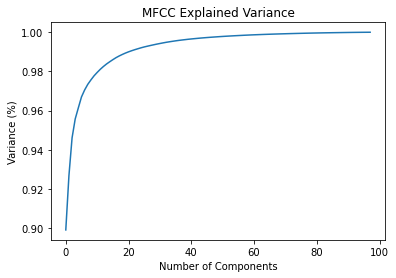

In [14]:
from sklearn.decomposition import PCA
#Fitting the PCA algorithm with our Data
pca = PCA().fit(mfcc_features)
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('MFCC Explained Variance')
plt.show()

In [15]:
from sklearn.decomposition import PCA
pca = PCA(n_components=69)
mfcc_features = pca.fit_transform(mfcc_features)

In [16]:
mfcc_features.shape

(1440, 69)

### Standardising Data

In [17]:
from sklearn.preprocessing import StandardScaler

data = mfcc_features
scaler = StandardScaler()
mfcc_features = scaler.fit_transform(data)

### Oversample "NEUTRAL" (EMOTION) in order to match our dataset

In [18]:
dictionary = {}
for i in mfcc_labels:
    dictionary[i] = dictionary.get(i,0) + 1

print(dictionary)

{'Neutral': 96, 'Calm': 192, 'Happy': 192, 'Sad': 192, 'Angry': 192, 'Fearful': 192, 'Disgust': 192, 'Surprised': 192}


In [19]:
pip install --user imbalanced-learn


Note: you may need to restart the kernel to use updated packages.


In [20]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
new_mfcc_features,  mfcc_labels = ros.fit_resample(mfcc_features,  mfcc_labels)

dictionary_2 = {}
for i in mfcc_labels:
    dictionary_2[i] = dictionary_2.get(i,0) + 1

print(dictionary_2)

{'Neutral': 192, 'Calm': 192, 'Happy': 192, 'Sad': 192, 'Angry': 192, 'Fearful': 192, 'Disgust': 192, 'Surprised': 192}


In [21]:
new_mfcc_features.shape

(1536, 69)

### Train-Test Split

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(new_mfcc_features, mfcc_labels, test_size=0.30, 
                                                    random_state=42, stratify = mfcc_labels, shuffle= True)

In [23]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

### Model Training Using Support Vector Machine 

In [24]:
clf = SVC(kernel='linear')
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.6052060737527115


### Hyper-Parameter Tuning using GridSearchCV

In [25]:
from sklearn.model_selection import GridSearchCV 
  
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['linear','poly','rbf']}  

grid = GridSearchCV(SVC(), param_grid, cv=10) 
  
# fitting the model for grid search 
grid.fit(X_train, y_train) 

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'poly', 'rbf']})

In [26]:
# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=10, gamma=0.01)


### EVALUATING MODEL USING CLASSIFICATION METRICS

In [27]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
grid_predictions = grid.predict(X_test) 
# print classification report 
print(classification_report(y_test, grid_predictions)) 
print(confusion_matrix(y_test, grid_predictions)) 
print()
print(accuracy_score(y_test, grid_predictions)) 

              precision    recall  f1-score   support

       Angry       0.85      0.81      0.83        57
        Calm       0.88      0.86      0.87        57
     Disgust       0.76      0.76      0.76        58
     Fearful       0.77      0.76      0.77        58
       Happy       0.75      0.66      0.70        58
     Neutral       0.82      0.93      0.87        57
         Sad       0.68      0.72      0.70        58
   Surprised       0.78      0.78      0.78        58

    accuracy                           0.78       461
   macro avg       0.78      0.78      0.78       461
weighted avg       0.78      0.78      0.78       461

[[46  0  2  1  3  0  2  3]
 [ 0 49  1  0  2  1  4  0]
 [ 3  3 44  0  2  2  1  3]
 [ 1  0  0 44  1  0  9  3]
 [ 3  1  5  2 38  4  3  2]
 [ 0  1  2  0  0 53  1  0]
 [ 0  1  2  7  1  3 42  2]
 [ 1  1  2  3  4  2  0 45]]

0.7830802603036876
